In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
df.duplicated().sum()

0

<Axes: >

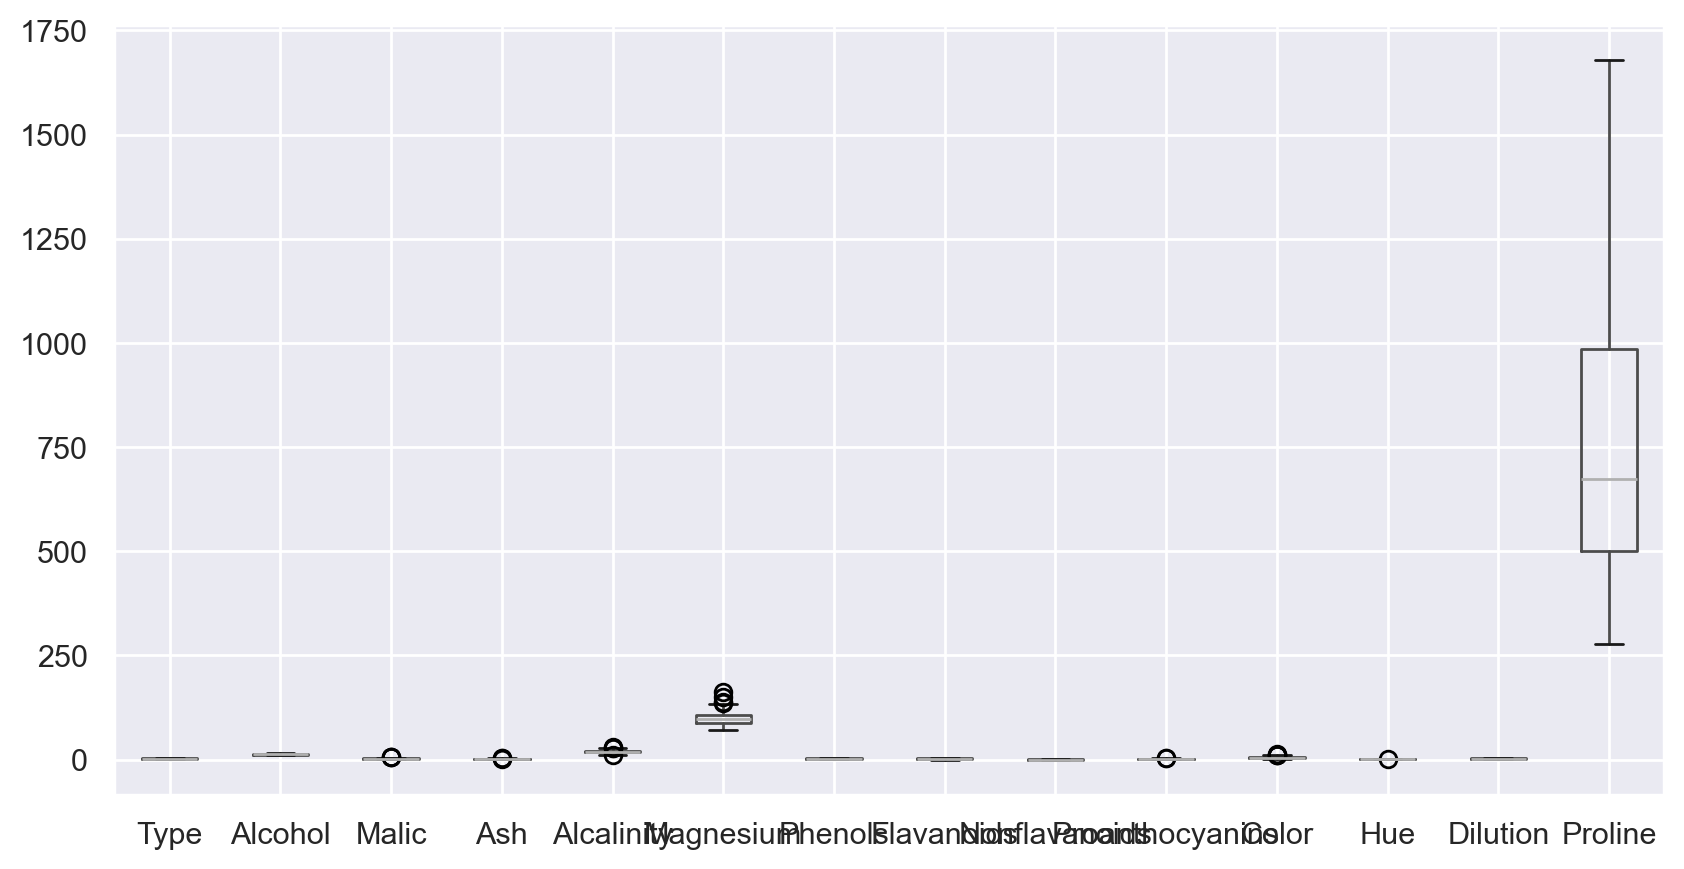

In [6]:
df.boxplot()

In [7]:
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [8]:
cols=['Malic', 'Alcalinity', 'Magnesium', 'Color', 'Hue']
capping(df, cols)

<Axes: >

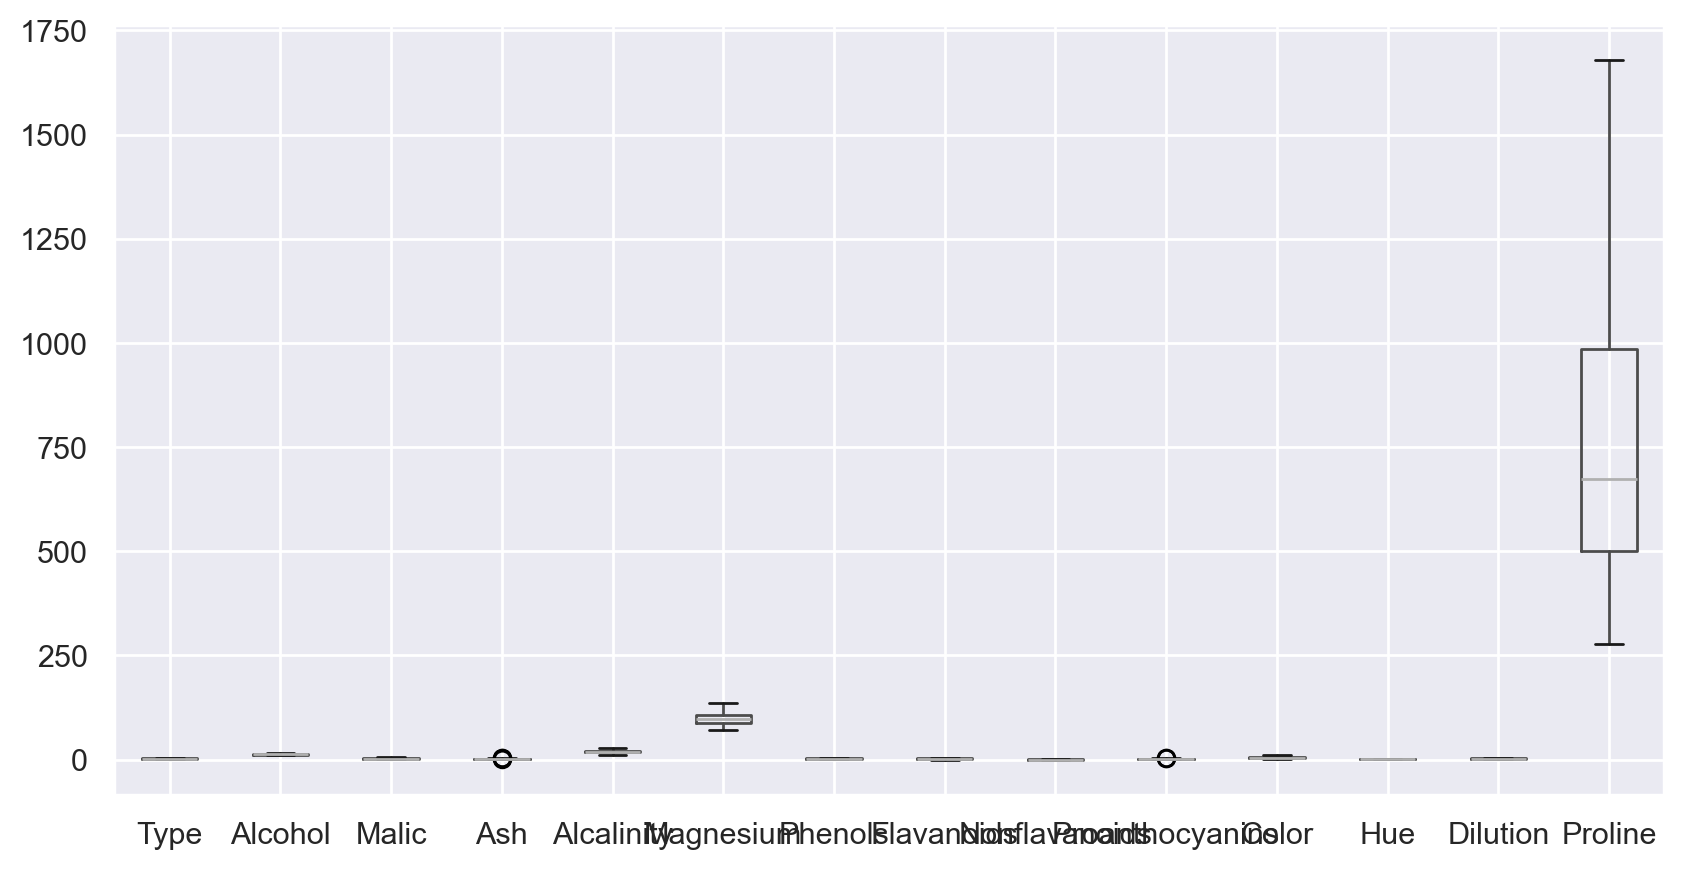

In [9]:
df.boxplot()

In [10]:
#these many outliers is ok from df.describe table

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

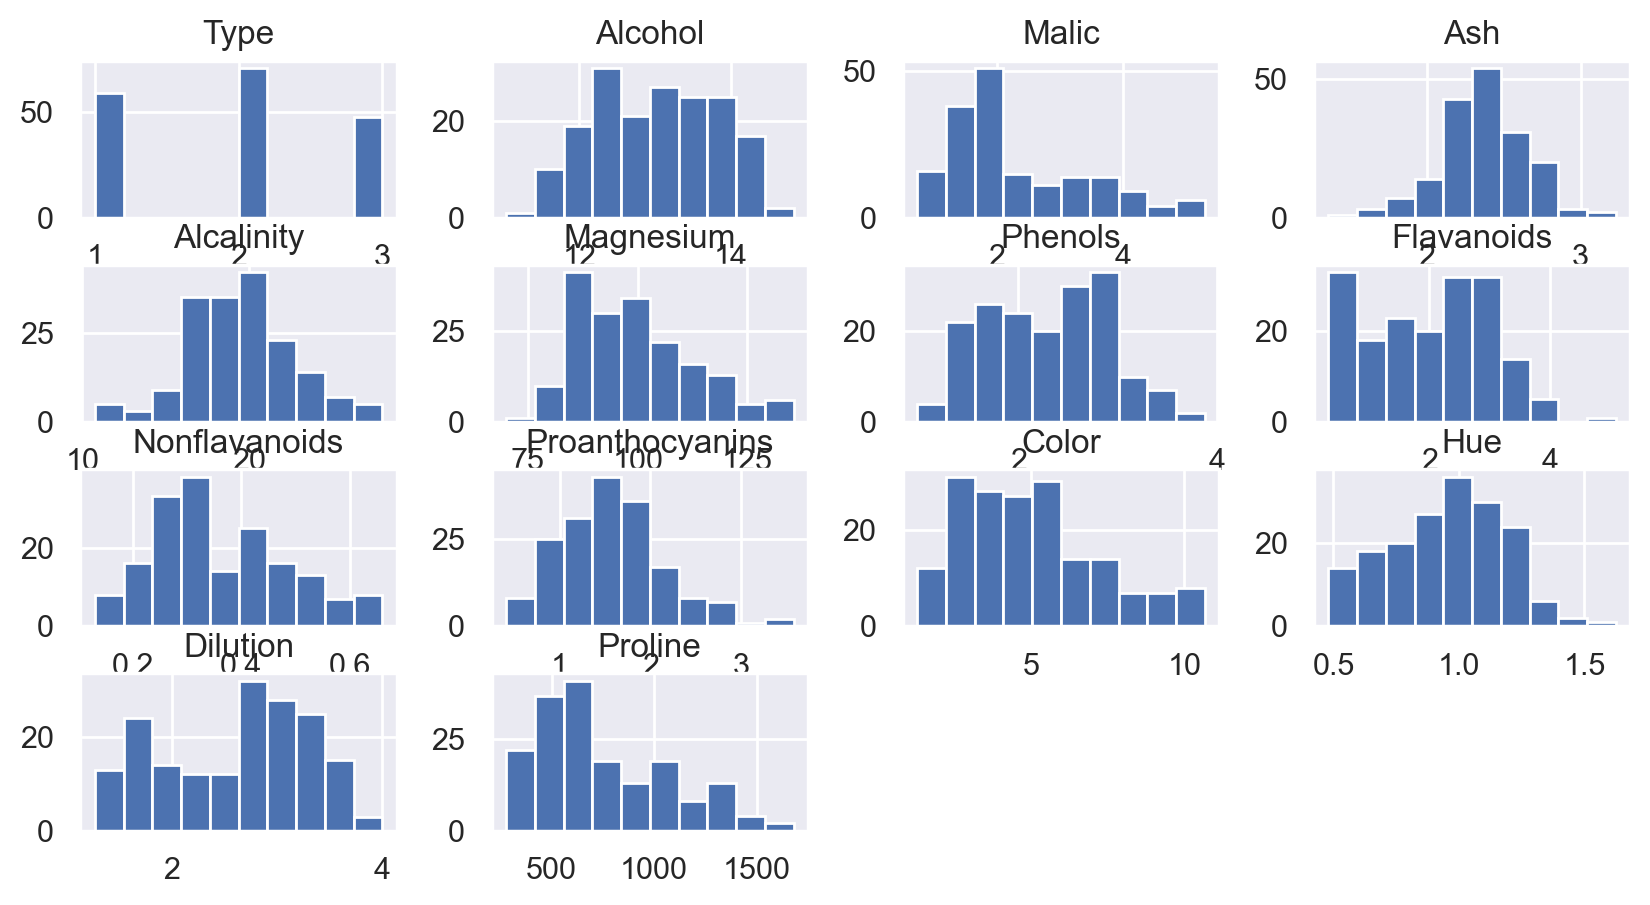

In [11]:
df.hist()

<Axes: >

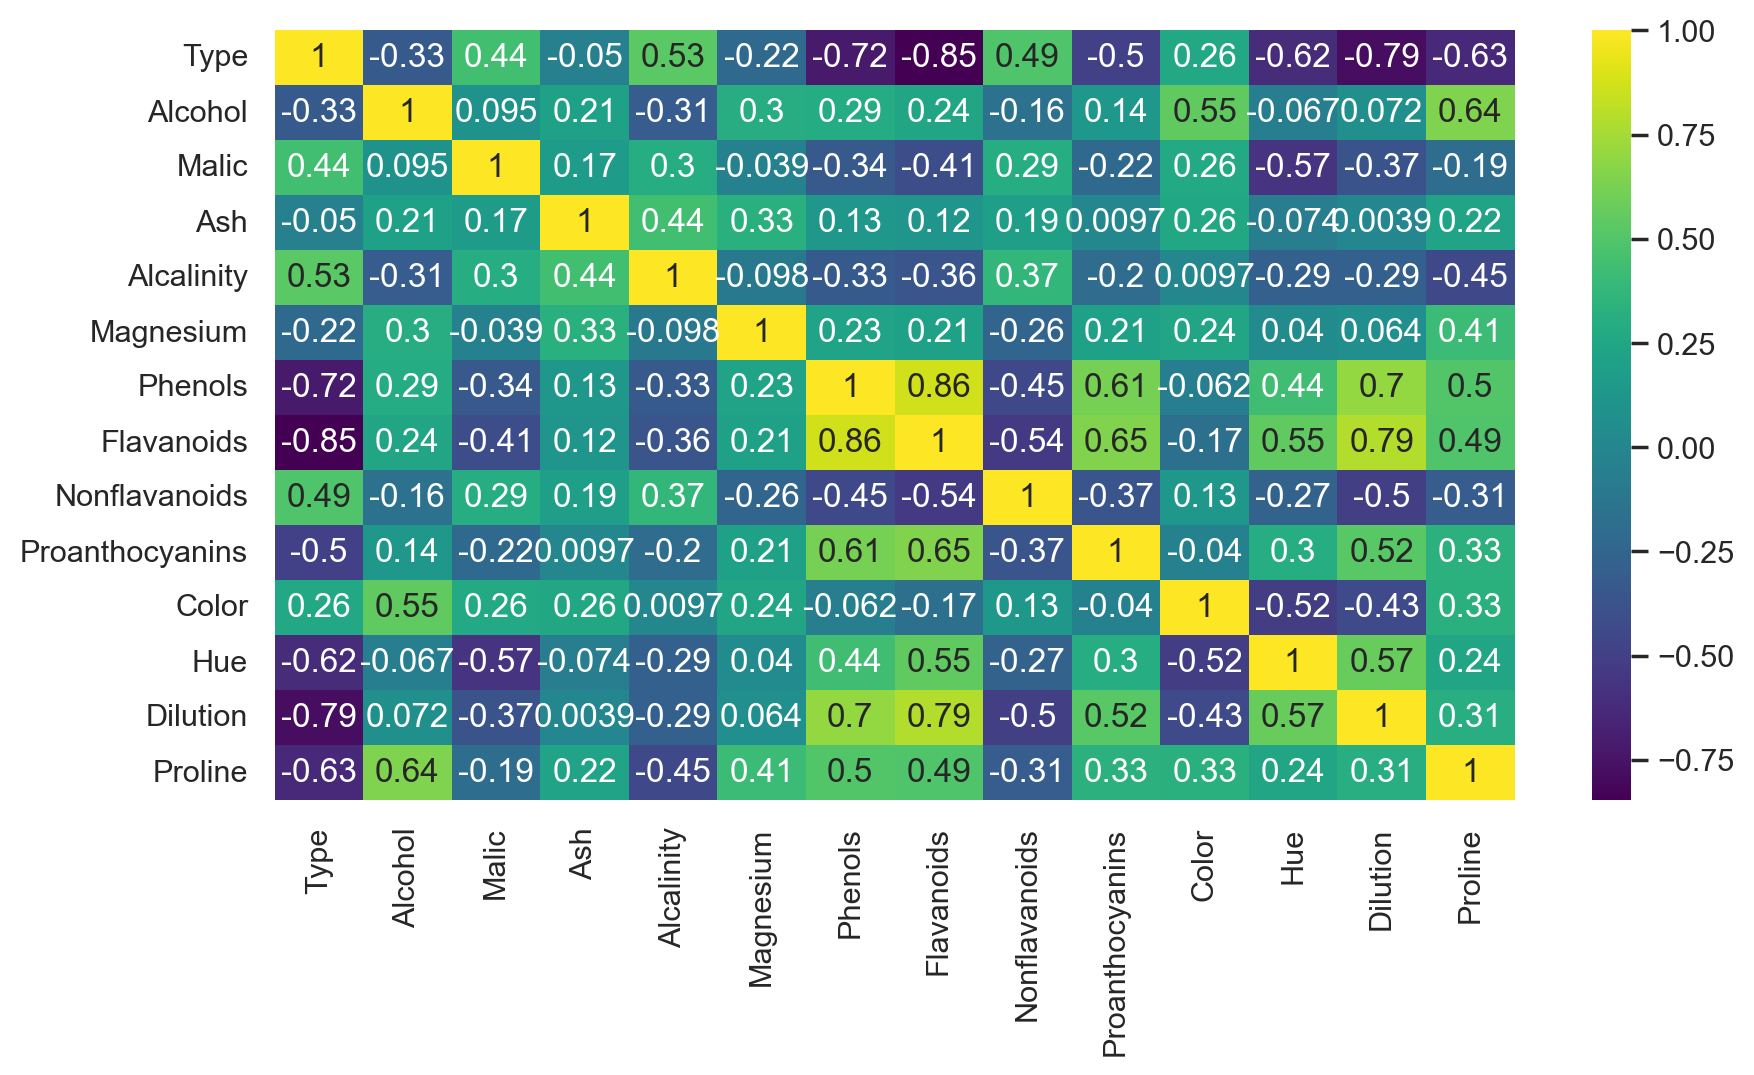

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='viridis')

In [13]:
x=df.iloc[:,1:]
y=df['Type']

In [14]:
sc=StandardScaler()
x1=x=sc.fit_transform(x)
x

array([[ 1.51861254, -0.56553422,  0.23205254, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.82799632, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.10933436, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.38935541, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.01273209, ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.36520822, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [15]:
pca=PCA()
pcs=pca.fit_transform(x)
pcs

array([[ 3.3451454 ,  1.51703208, -0.13951611, ...,  0.32233827,
         0.6042239 , -0.09528958],
       [ 2.23476725, -0.32139022, -2.02150341, ...,  0.19460356,
         0.33413264, -0.02110658],
       [ 2.51580083,  1.01578431,  0.98880221, ...,  0.32448124,
         0.02898613,  0.03345075],
       ...,
       [-2.67403449,  2.87518099, -0.95544395, ..., -0.54378141,
         0.70380029,  0.01673226],
       [-2.3757137 ,  2.39493937, -0.55869574, ..., -0.34981556,
         0.39053837, -0.0528378 ],
       [-3.2286991 ,  2.78304074,  1.00217205, ...,  0.19522622,
        -0.14294494, -0.32657957]])

Text(0.5, 1.0, 'Scree Plot')

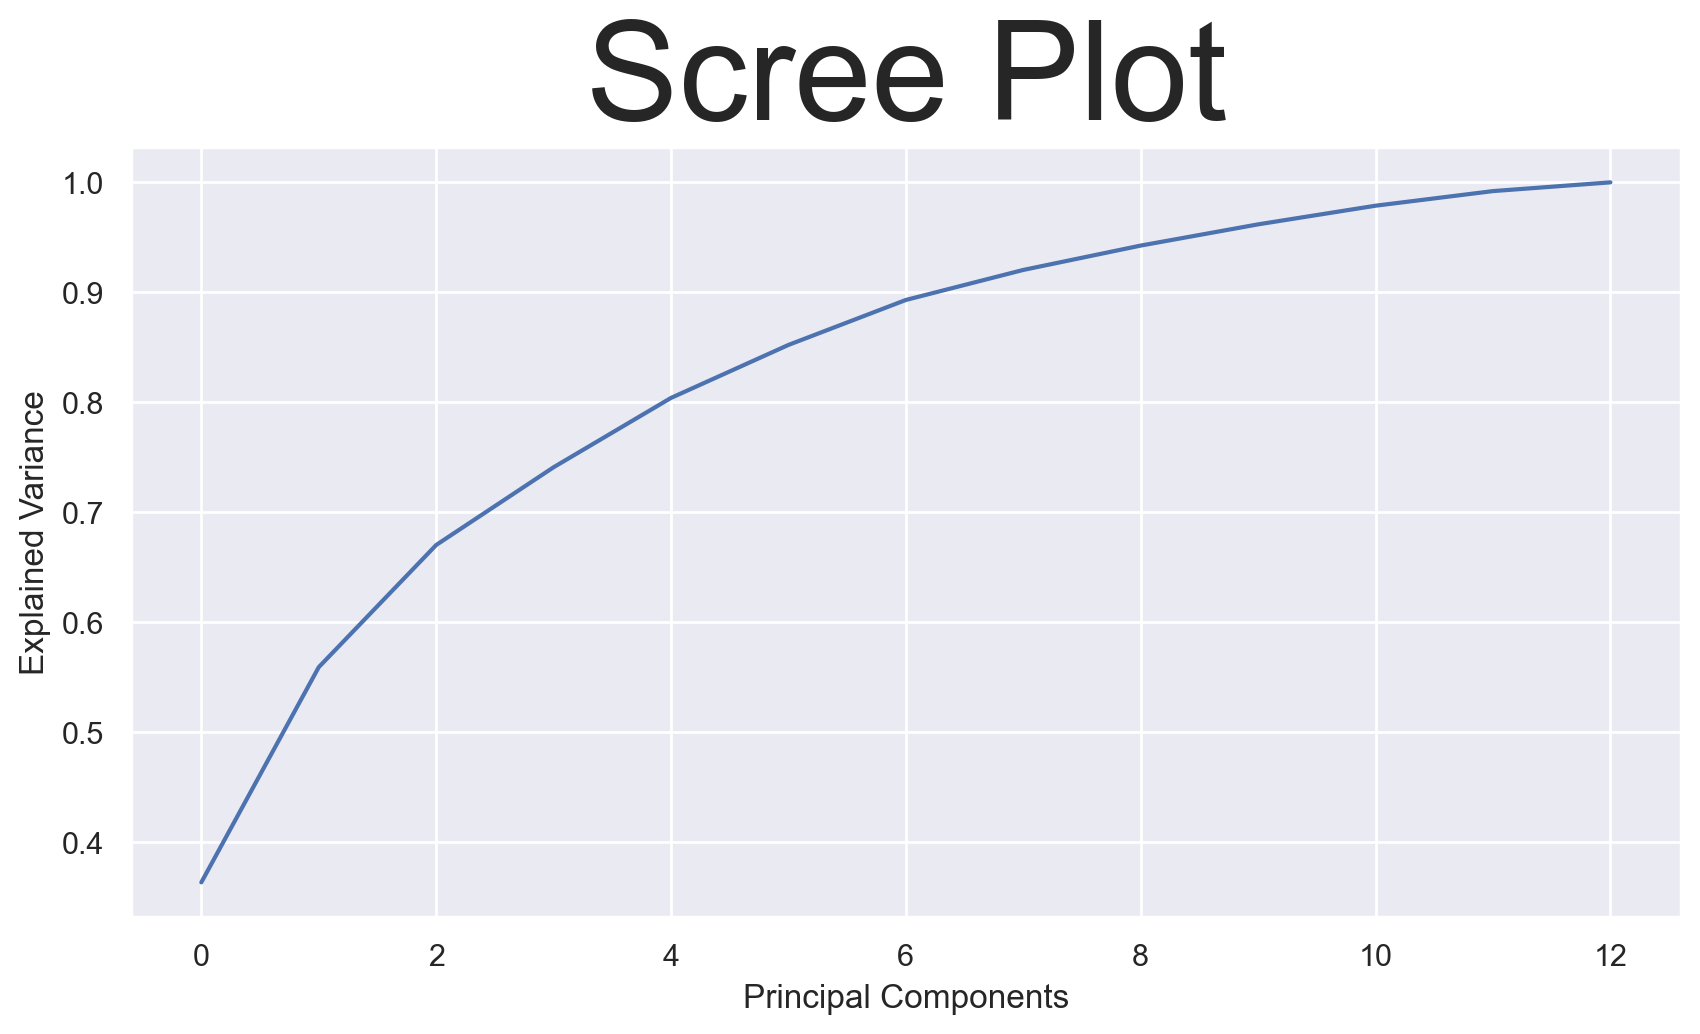

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 50)

In [17]:
#from above plot we can take no. of principle components as 7

In [18]:
pca = PCA(n_components = 7)
pcs = pca.fit_transform(x)
pcs

array([[ 3.3451454 ,  1.51703208, -0.13951611, ...,  0.723936  ,
         0.18900646,  0.67823488],
       [ 2.23476725, -0.32139022, -2.02150341, ..., -0.1344964 ,
         0.95867871,  0.09205406],
       [ 2.51580083,  1.01578431,  0.98880221, ..., -0.35972635,
        -0.56352296,  0.40239808],
       ...,
       [-2.67403449,  2.87518099, -0.95544395, ...,  1.18509613,
        -0.3327302 ,  0.78722821],
       [-2.3757137 ,  2.39493937, -0.55869574, ...,  0.74765659,
        -1.25623703,  0.7251858 ],
       [-3.2286991 ,  2.78304074,  1.00217205, ..., -1.0201376 ,
        -0.2530009 , -0.12841349]])

In [19]:
data = pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.345145,1.517032,-0.139516,-0.193076,0.723936,0.189006,0.678235
1,2.234767,-0.321390,-2.021503,-0.357105,-0.134496,0.958679,0.092054
2,2.515801,1.015784,0.988802,0.753726,-0.359726,-0.563523,0.402398
3,3.770605,2.777831,-0.169060,0.567759,-0.322076,-0.123453,-0.416038
4,1.016637,0.929478,2.062034,-0.410894,0.374435,0.369030,0.506862
...,...,...,...,...,...,...,...
173,-3.308205,2.171708,-0.380891,0.892815,-0.703119,1.003716,0.743805
174,-2.614641,1.792694,0.202940,0.404237,0.182174,-0.004627,0.138712
175,-2.674034,2.875181,-0.955444,0.418405,1.185096,-0.332730,0.787228
176,-2.375714,2.394939,-0.558696,-0.603460,0.747657,-1.256237,0.725186


In [20]:
#applying kmeans for the original dataset

In [21]:
from sklearn.cluster import KMeans

In [46]:
k=3
km=KMeans(n_clusters=k, random_state=42, n_init='auto')

yp=km.fit_predict(x1)
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [48]:
#since there are more dimensions cannot be visualized on scatterplot

In [50]:
#silhoutte score

In [52]:
from sklearn.metrics import silhouette_score

In [54]:
silhouette_score(x1,yp)

0.28627022951357345

In [56]:
#this is low not good score

In [60]:
kmp=KMeans(n_clusters=3, random_state=42)
ypred=km.fit_predict(data)
data['Cluster'] = ypred

In [62]:
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Cluster
0,3.345145,1.517032,-0.139516,-0.193076,0.723936,0.189006,0.678235,2
1,2.234767,-0.321390,-2.021503,-0.357105,-0.134496,0.958679,0.092054,2
2,2.515801,1.015784,0.988802,0.753726,-0.359726,-0.563523,0.402398,2
3,3.770605,2.777831,-0.169060,0.567759,-0.322076,-0.123453,-0.416038,2
4,1.016637,0.929478,2.062034,-0.410894,0.374435,0.369030,0.506862,2
...,...,...,...,...,...,...,...,...
173,-3.308205,2.171708,-0.380891,0.892815,-0.703119,1.003716,0.743805,1
174,-2.614641,1.792694,0.202940,0.404237,0.182174,-0.004627,0.138712,1
175,-2.674034,2.875181,-0.955444,0.418405,1.185096,-0.332730,0.787228,1
176,-2.375714,2.394939,-0.558696,-0.603460,0.747657,-1.256237,0.725186,1


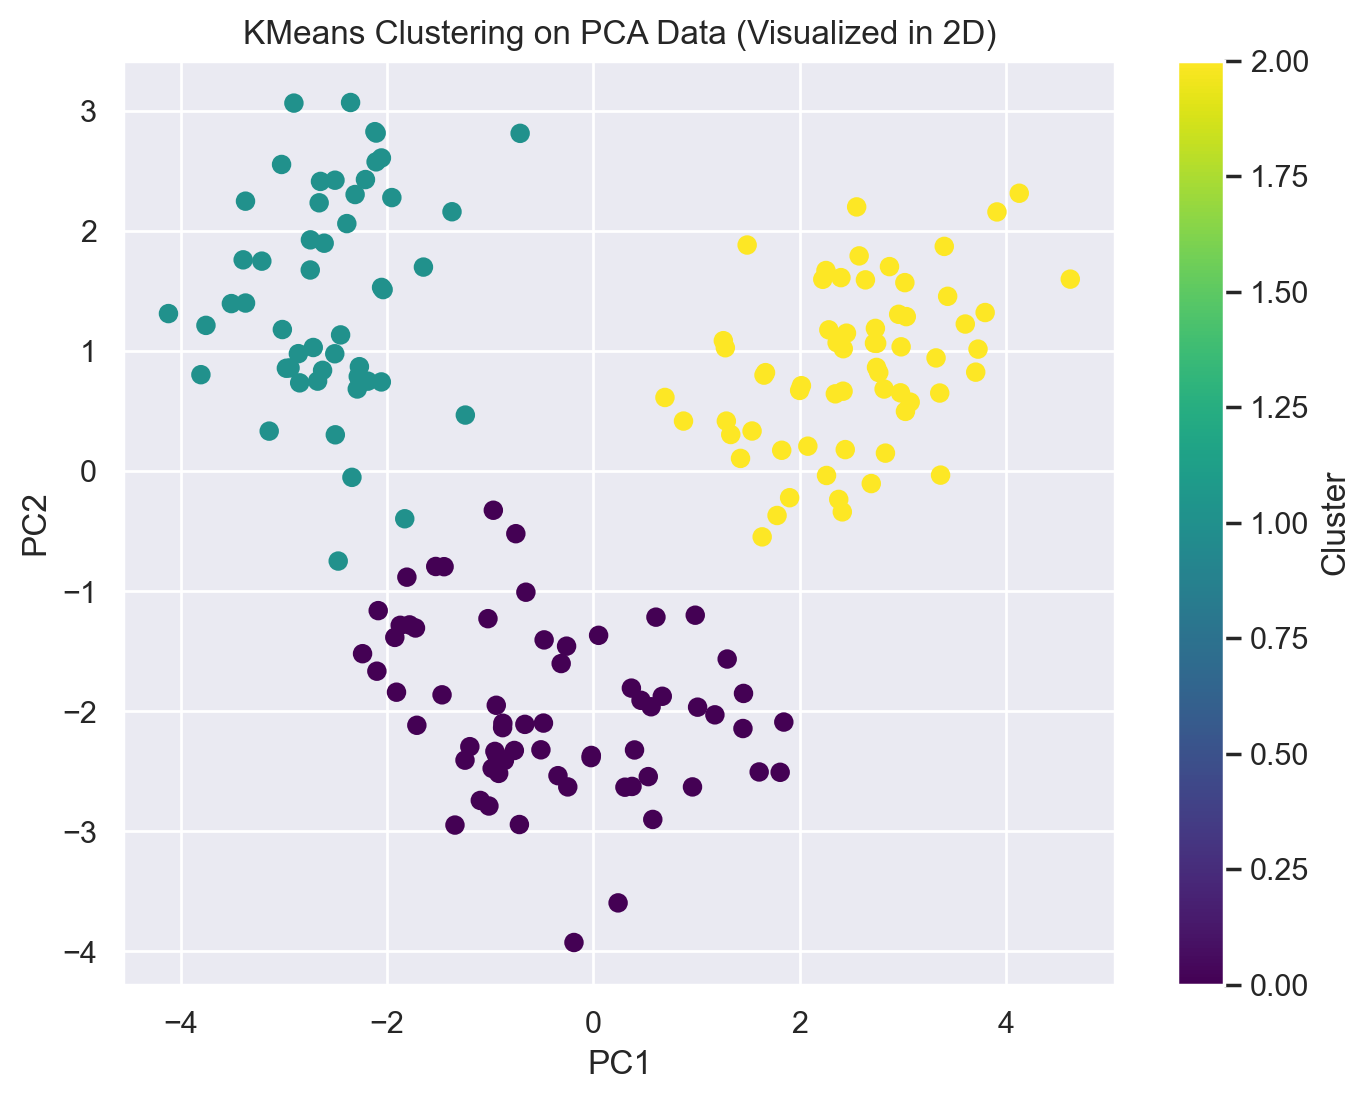

In [74]:
#since the data has 7 dimensions and cannot be visualized i have reduced to 2 dimensions and plotted the 2d scatterplot just for visulaiztaions

pca_2d = PCA(n_components=2).fit_transform(data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=ypred, cmap='viridis')
plt.title('KMeans Clustering on PCA Data (Visualized in 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

In [76]:
score = silhouette_score(data, ypred)
print(f'Silhouette Score on PCA Data: {score:.3f}')

Silhouette Score on PCA Data: 0.367
